<a href="https://colab.research.google.com/github/Fliptoss/ML_stuff/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Salary')

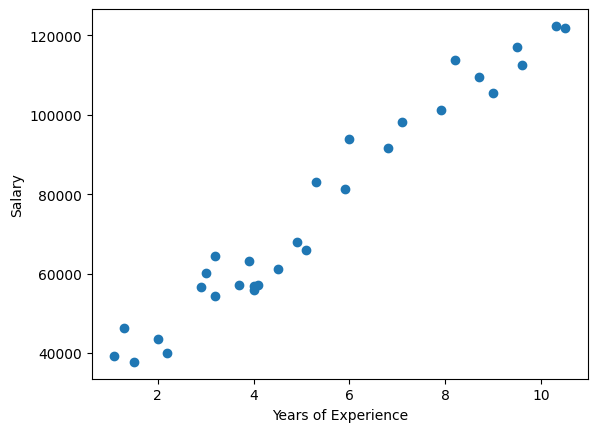

In [7]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [8]:
# finding the correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
# import seaborn
import seaborn as sns

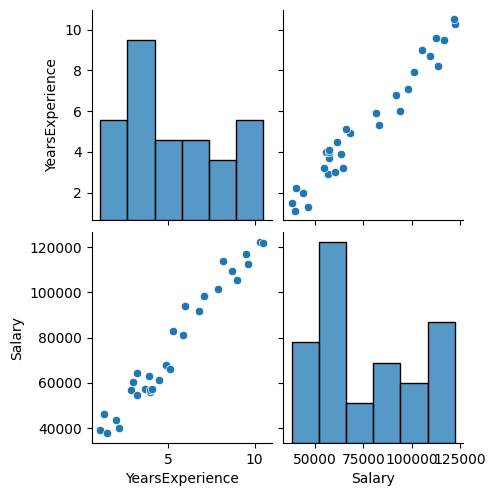

In [10]:
sns.pairplot(df)

In [16]:
## selecting independent and dependent features
#X = df['YearsExperience']
#type(X) # its in series. we do not want that. we want it in a DataFrame

In [15]:
X = df[['YearsExperience']]
type(X) ## we want it in a DataFrame

pandas.core.frame.DataFrame

In [17]:
X=df[['YearsExperience']]
np.array(X).shape

(30, 1)

In [18]:
y=df['Salary'] ## dependent feature can be a series.
np.array(y).shape

(30,)

In [19]:
## Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_train.shape

(22, 1)

In [21]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [24]:
## we do not have to apply it to our dependent feature. we apply it to our independt feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[ 1.79640106],
       [ 0.03908914],
       [ 1.27294644],
       [ 0.1886476 ],
       [-0.59653431],
       [-0.40958624],
       [ 2.05812836],
       [ 1.45989452]])

In [28]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
print("Coefficient or slope", regression.coef_)
print("Intercept", regression.intercept_)

Coefficient or slope [25063.1519945]
Intercept 70416.40909090909


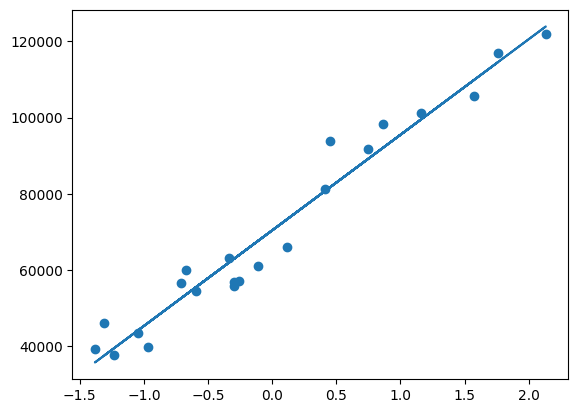

In [32]:
## PLOT with respect to training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction of test data
1. prediction Salary output = intercept + coef_(YearsExperience)
2. y_pred_test = 70416.40 + 25063.15(X_test)

In [34]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [36]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [39]:
print(mse)
print(mae)
print(rmse)


38802588.99247064
5056.995466663591
6229.172416338356


### R square
Formula
R^2 = 1 - SSR / SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test, y_pred)

In [42]:
print(score)

0.9347210011126782


### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where
R2 : the R2 of the model n: the number of observations k: the number of predictor variables

In [43]:
## display adjusted R-squared
1 - (1-score)*(len(y_test) -1)/(len(y_test) - X_test.shape[1]-1)

0.9238411679647912

In [44]:
### OLS linear regression
import statsmodels.api as sm

In [45]:
model=sm.OLS(y_train, X_train).fit()

In [46]:
prediction = model.predict(X_test)

In [47]:
prediction

array([ 45023.47271018,    979.6971356 ,  31904.0501986 ,   4728.10356748,
       -14951.03019988, -10265.52216003,  51583.18396597,  36589.55823845])

In [48]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Thu, 15 May 2025   Prob (F-statistic):                       0.119
Time:                        12:01:07   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
## prediction for the new data
regression.predict(scaler.transform([[1.2]]))  ## scaler.transform should always be done

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36723.34673164])